# Demo de implementação de algoritmos de regressão

### Importar módulos necessários

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split as split
from sklearn import datasets
from slickml.metrics import (
    RegressionMetrics,
)  # downloaded from https://github.com/slickml/slick-ml
from matplotlib import pyplot as plt
import shap

### Carregar o dataset

https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

In [2]:
# loading a sample regression dataset (house prices)
houses = datasets.fetch_california_housing()

In [3]:
# X -> inputs; y -> output/target
X = houses.data
y = houses.target

In [4]:
pd.DataFrame(X, columns=houses.feature_names)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


##### Divisão entre Dados de Treino (X_tr, y_tr) e Dados de Teste (X_ts, y_ts)

In [5]:
# train and test split
X_tr, X_ts, y_tr, y_ts = split(X, y, test_size=0.33)

### Treinar e Avaliar Algoritmos

Random Forest (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [6]:
# train and predict with Random Forest Regressor
RF = RandomForestRegressor()
RF.fit(X_tr, y_tr)
pred = RF.predict(X_ts)

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.805000,0.805000,0.337000,0.262000,0.023000,0.192000,0.873000,0.359000,1.083000


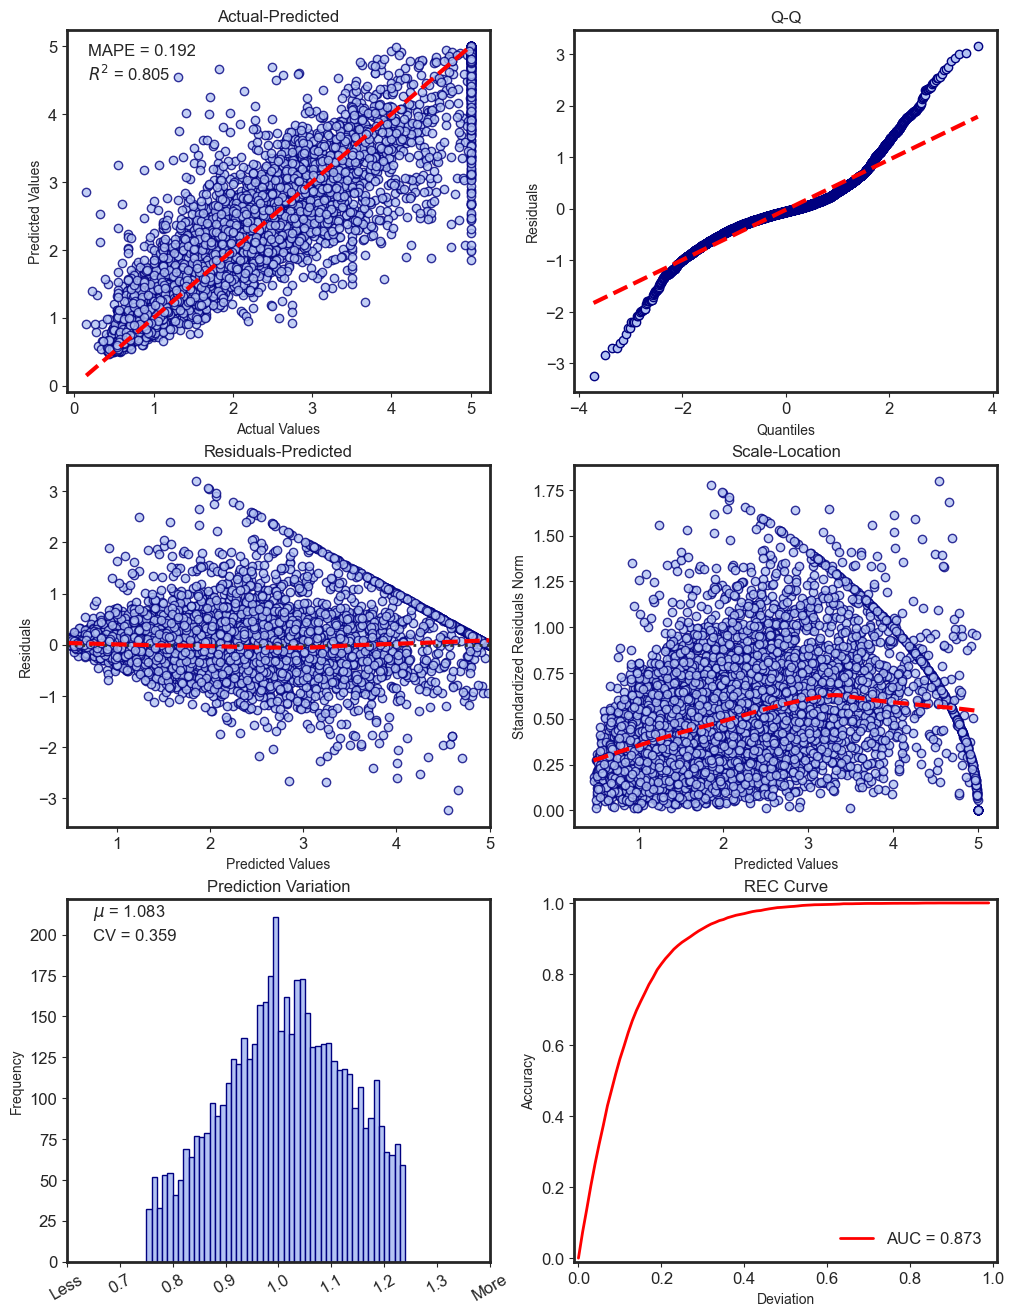

In [7]:
# Regression metrics for Random Forest
reg_metrics = RegressionMetrics(y_ts, pred)
reg_metrics.plot()

AdaBoost (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)

In [8]:
# train and predict with Adaboost Regressor
AR = AdaBoostRegressor()
AR.fit(X_tr, y_tr)
pred2 = AR.predict(X_ts)

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.369000,0.551000,0.800000,0.845000,0.098000,0.601000,0.717000,0.468000,1.529000


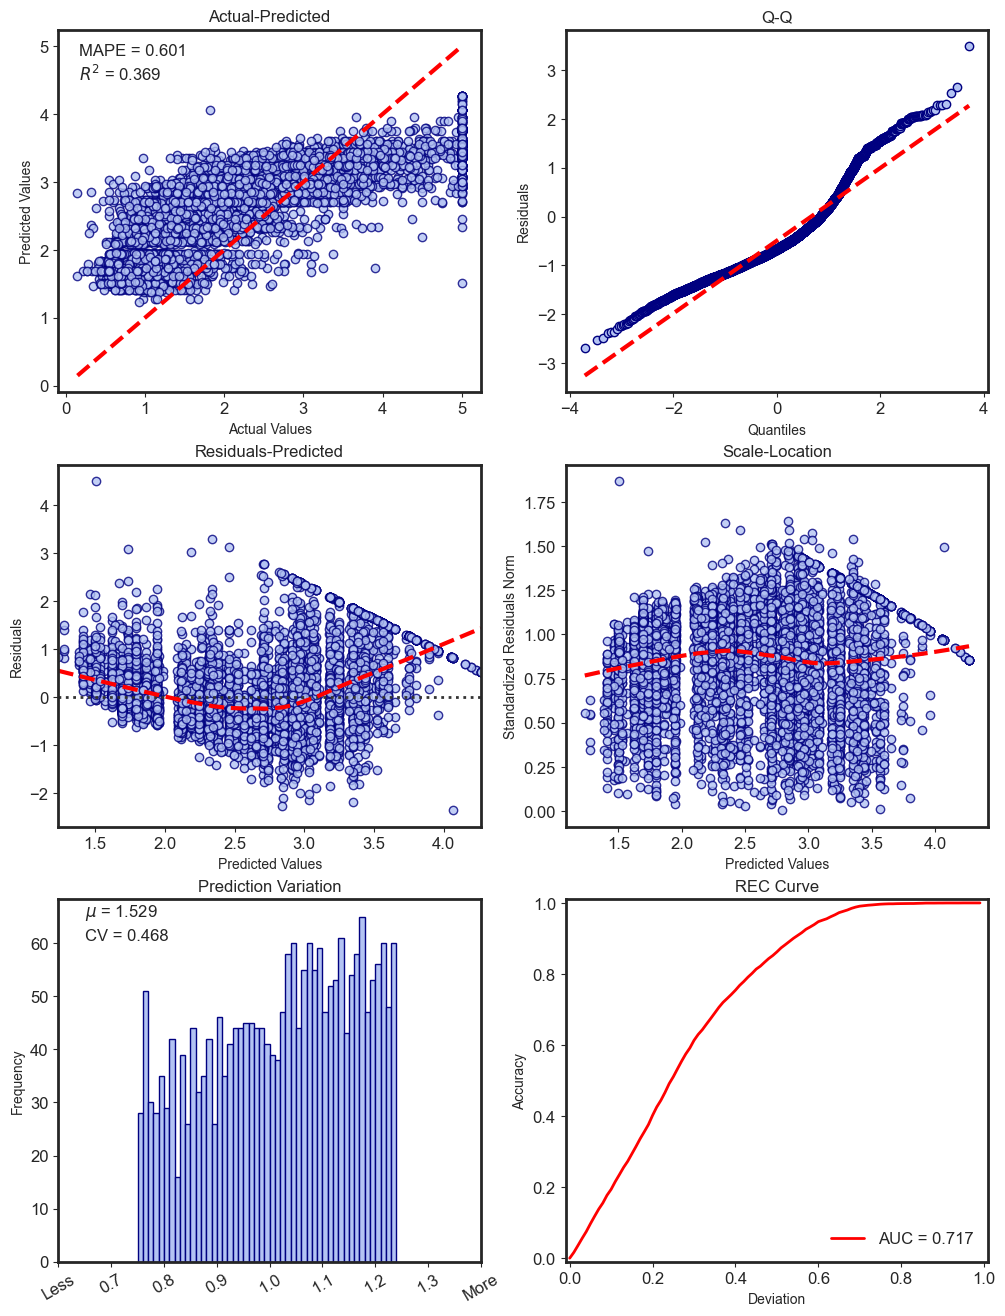

In [9]:
# Regression metrics for Adaboost
reg_metrics2 = RegressionMetrics(y_ts, pred2)
reg_metrics2.plot()

Árvores de Decisão (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)

In [ ]:
DT = tree.DecisionTreeRegressor(max_depth=3, random_state=42)
DT.fit(X_tr, y_tr)
pred3 = DT.predict(X_ts)

[]

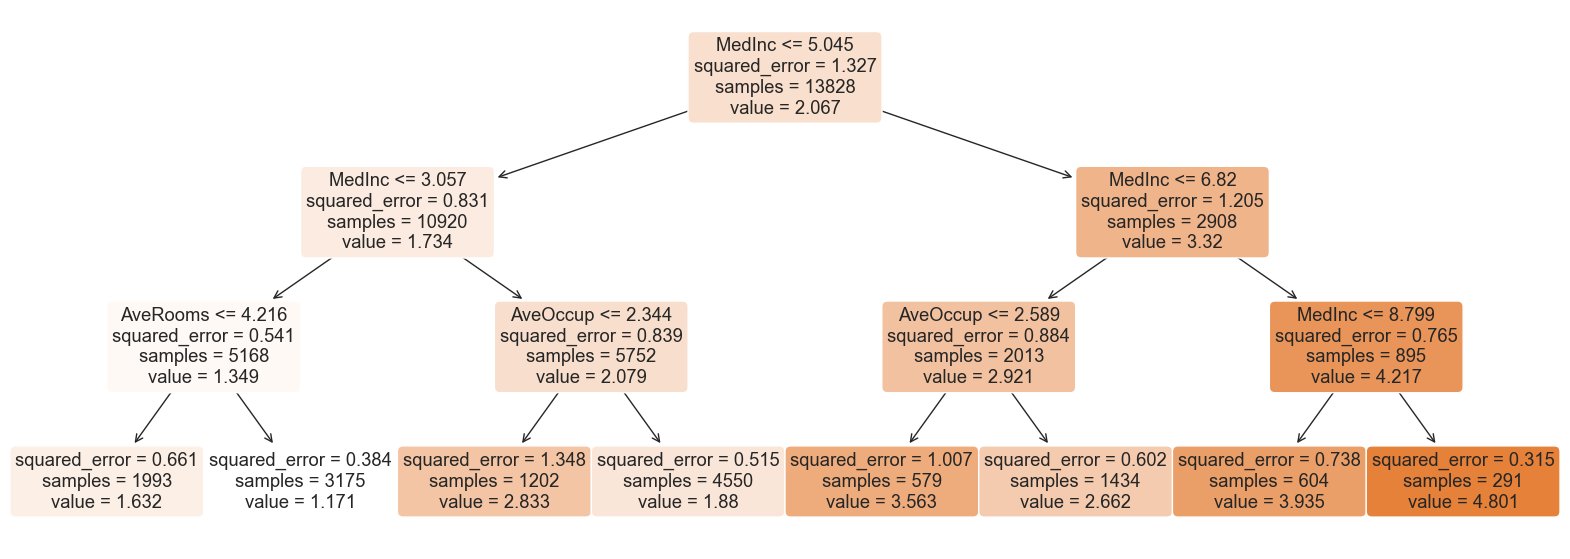

In [11]:
plt.figure(figsize=(20, 7))
tree.plot_tree(
    DT, feature_names=houses.feature_names, filled=True, rounded=True
)
plt.plot()

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.522000,0.522000,0.595000,0.640000,0.064000,0.374000,0.778000,0.462000,1.182000


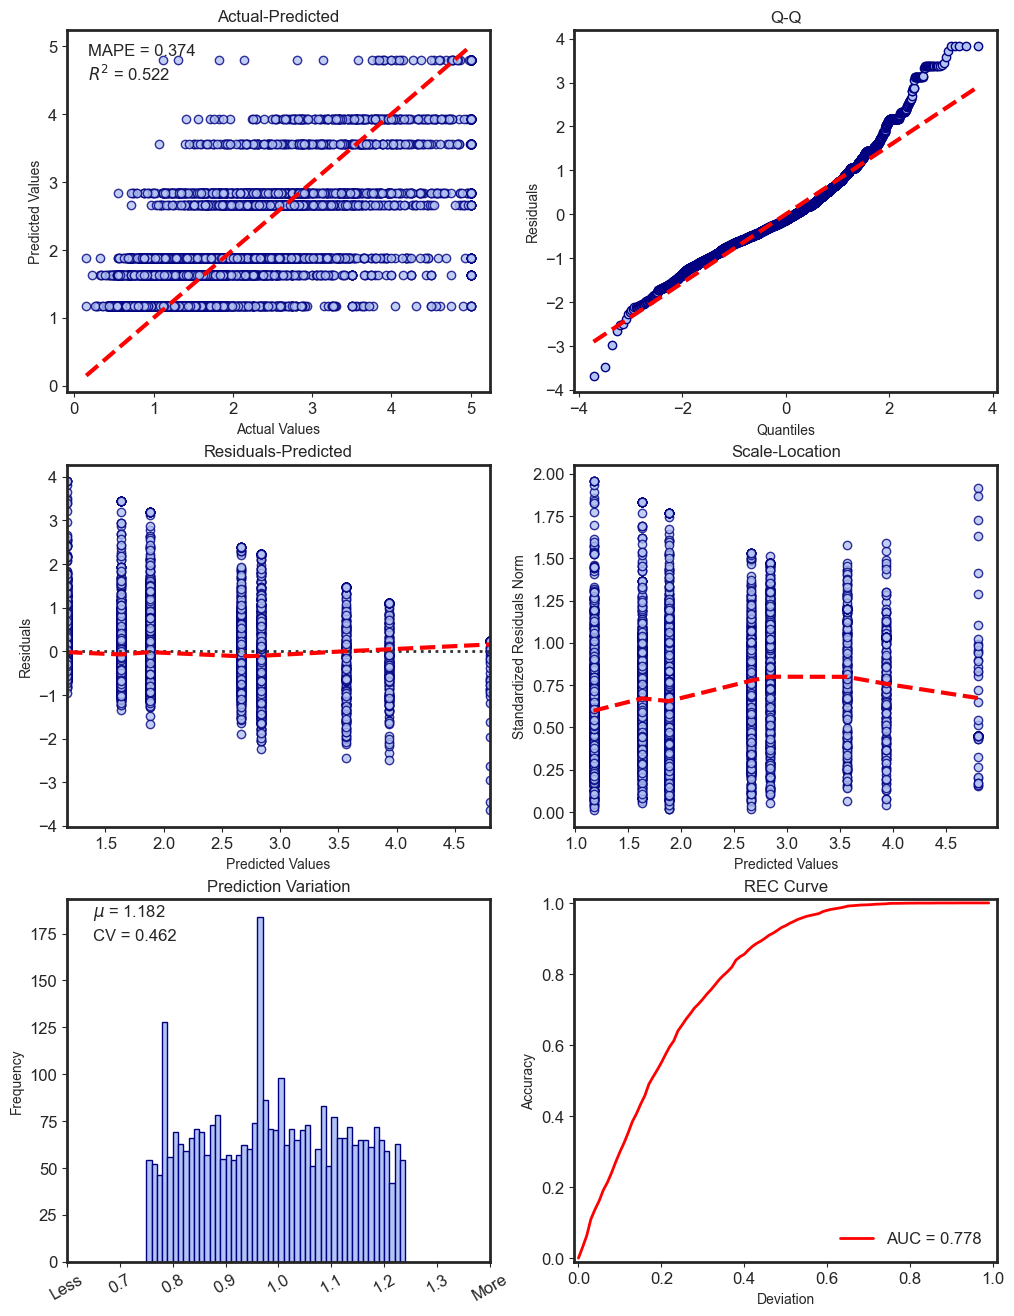

In [19]:
# Regression metrics for Decision Tree
reg_metrics3 = RegressionMetrics(y_ts, pred3)
reg_metrics3.plot()

### Comparar os diferentes algoritmos

In [13]:
# Random Forest deviation and accuracy values (for custom visualization)
RF_dev = reg_metrics.deviation_
RF_acc = reg_metrics.accuracy_
# Adaboost deviation and accuracy values (for custom visualization)
AR_dev = reg_metrics2.deviation_
AR_acc = reg_metrics2.accuracy_
# Decision Tree deviation and accuracy values (for custom visualization)
DT_dev = reg_metrics3.deviation_
DT_acc = reg_metrics3.accuracy_

#### Visualização inadequada para comparação

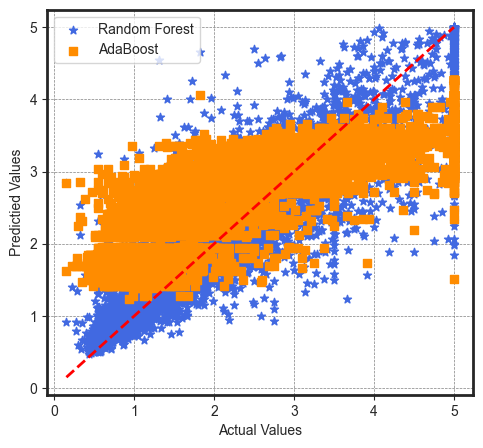

In [14]:
# RSP - comparison of models
fig, ax = plt.subplots(1, 1, figsize=(5.5, 5))
plt.scatter(y_ts, pred, marker="*", color="royalblue", label="Random Forest")
plt.scatter(y_ts, pred2, marker="s", color="darkorange", label="AdaBoost")
plt.plot([min(y_ts), max(y_ts)], [min(y_ts), max(y_ts)], ls="--", color="red")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.ylabel("Predictied Values")
plt.xlabel("Actual Values")
plt.legend(loc=2)
plt.show()

#### Visualização adequada para comparação

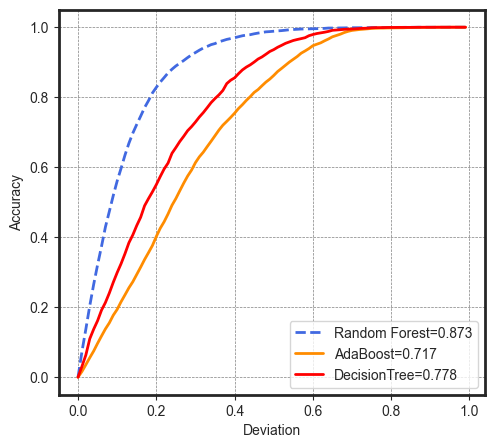

In [17]:
# REC curve - comparison of models
fig, ax = plt.subplots(1, 1, figsize=(5.5, 5))
plt.plot(
    RF_dev,
    RF_acc,
    color="royalblue",
    ls="--",
    lw=2,
    label="Random Forest={}".format(round(reg_metrics.auc_rec_, 3)),
)
plt.plot(
    AR_dev,
    AR_acc,
    color="darkorange",
    ls="-",
    lw=2,
    label="AdaBoost={}".format(round(reg_metrics2.auc_rec_, 3)),
)
plt.plot(
    DT_dev,
    DT_acc,
    color="red",
    ls="-",
    lw=2,
    label="DecisionTree={}".format(round(reg_metrics3.auc_rec_, 3)),
)
plt.legend(loc=4)
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.xlabel("Deviation")
plt.ylabel("Accuracy")
plt.show()

In [31]:
metrics = pd.concat(
    [
        reg_metrics.get_metrics(),
        reg_metrics2.get_metrics(),
        reg_metrics3.get_metrics(),
    ]
)
metrics.index = ["RandomForest", "AdaBoost", "DecisionTree"]
metrics

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
RandomForest,0.805,0.805,0.337,0.262,0.023,0.192,0.873,0.359,1.083
AdaBoost,0.369,0.551,0.800,0.845,0.098,0.601,0.717,0.468,1.529
DecisionTree,0.522,0.522,0.595,0.640,0.064,0.374,0.778,0.462,1.182
